In [1]:
import numpy as np 
import pandas as pd 
import math
import matplotlib.pyplot as plt 
import seaborn as sns 
import datetime as dt 
from pandas_datareader import data as pdr 
import yfinance as yf



In [2]:
def get_data(stocks, start, end):
    stock_data = yf.download(stocks, start=start, end=end)['Close']
    returns = stock_data.pct_change()
    mean_returns = returns.mean()
    covmatrix = returns.cov()
    return mean_returns, covmatrix

stocks = ['AAPL', 'MSFT', 'GOOGL']  # example stocks
end_date = dt.datetime.now()
start_date = end_date - dt.timedelta(days=300)

mean_returns, covmatrix = get_data(stocks, start_date, end_date)
print(mean_returns)
print(covmatrix)

[*********************100%%**********************]  3 of 3 completed

Ticker
AAPL     0.000683
GOOGL    0.001571
MSFT     0.001618
dtype: float64
Ticker      AAPL     GOOGL      MSFT
Ticker                              
AAPL    0.000196  0.000085  0.000075
GOOGL   0.000085  0.000308  0.000103
MSFT    0.000075  0.000103  0.000151


In [3]:
weights = np.random.random(len(mean_returns))
weights /= np.sum(weights)

print(weights)

[0.39448151 0.26502387 0.34049463]


Text(0.5, 1.0, 'MC simulation of a stock portfolio')

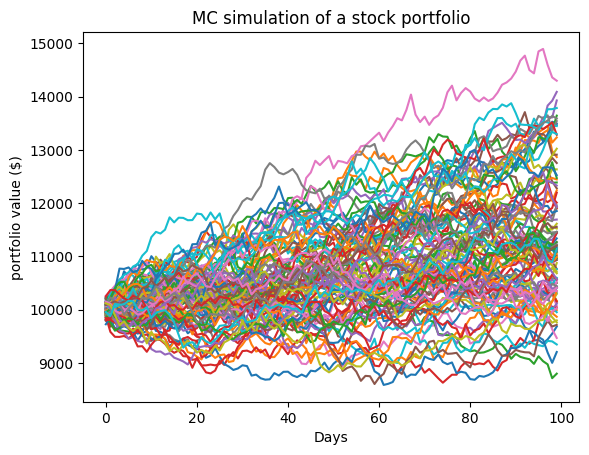

In [4]:
# Monte Carlo Simulation 
mc_sims = 100 
T = 100 

meanM = np.full(shape=(T,len(weights)),fill_value=mean_returns)
meanM = meanM.T
initialPortfolio = 10000

portfolio_sims = np.full(shape=(T, mc_sims), fill_value=0.0)
for m in range(mc_sims):
    Z = np.random.normal(size=(T, len(weights)))
    L = np.linalg.cholesky(covmatrix)
    daily_returns = meanM + np.inner(L, Z)
    portfolio_sims[:,m] = np.cumprod(np.inner(weights, daily_returns.T)+1)*initialPortfolio

plt.plot(portfolio_sims)
plt.ylabel('portfolio value ($)')
plt.xlabel("Days")
plt.title("MC simulation of a stock portfolio")



In [5]:
def mcVar(returns, alpha=5):
    
    if isinstance(returns, pd.Series):
        return np.percentile(returns, alpha)
    else:
        raise TypeError("Expected a pandas data series.")

In [6]:
def mccVar(returns, alpha=5):
    if isinstance(returns, pd.Series):
        belowVar = returns <= mcVar(returns, alpha=alpha)
        return returns[belowVar].mean()
    else:
        raise TypeError("Expected a pandas data series.")

In [8]:
portfolio_results = pd.Series(portfolio_sims[-1,:])
VaR = initialPortfolio - mcVar(portfolio_results, alpha=5)
CVaR = initialPortfolio - mccVar(portfolio_results, alpha=5)
print('VaR: ${}'.format(round(VaR,2)))
print('CVaR: ${}'.format(round(CVaR,2)))

VaR: $287.47
CVaR: $700.31
